# Exploratory Data Analysis (EDA)

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [23]:
#!pip install plotly
#!pip install chart_studio
import plotly
import chart_studio.plotly as pltly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [24]:
import plotly.express as px

In [25]:
#!pip install sorted-months-weekdays
#!pip install sort-dataframeby-monthorweek

In [26]:
import sort_dataframeby_monthorweek as sdm

In [27]:
%pwd # check working directory 

'/Users/oliviawang/Documents/Hotel_booking_prediction_Python'

In [28]:
os.chdir("/Users/oliviawang/Documents/Hotel_booking_prediction_Python")

In [29]:
%store -r df_updated
%store -r df

In [30]:
df_updated.shape

(119210, 30)

In [31]:
df.shape

(119390, 30)

In [32]:
df_updated.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


### 1. Where are customers who didn't cancel the rooms from?

In [33]:
# extract out the rows that the booking is NOT canceled
not_canceled = df_updated[df_updated['is_canceled'] == 0]

In [34]:
# calculate the percentage of customers from different countries
cus_country_per = not_canceled['country'].value_counts() / len(not_canceled)
cus_country_per = cus_country_per.reset_index()
cus_country_per.columns = ['country', 'percentage_of_guests']
cus_country_per

,country,percentage_of_guests
0,PRT,0.285265
1,GBR,0.128888
2,FRA,0.112890
3,ESP,0.085094
4,DEU,0.080881
...,...,...
160,BHR,0.000013
161,DJI,0.000013
162,MLI,0.000013
163,NPL,0.000013


In [35]:
plt.figure(figsize = (20, 15))
map_guest = px.choropleth(cus_country_per,
             locations = cus_country_per['country'],
             color = cus_country_per['percentage_of_guests'],
             hover_name = cus_country_per['country'],
             title = 'Home country of guests')

<Figure size 1440x1080 with 0 Axes>

In [36]:
map_guest.show()

The majority of the customers are from Europe. Approximately 28.5% of the customers are from Protugal, 12.9% of the cutsomers are from Great Britain, and 11.3% of the customers are from France.

### 2. The price comparison between different hotels and different room types

In [37]:
not_canceled.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [82]:
not_canceled['hotel'].unique() #2

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [81]:
not_canceled['reserved_room_type'].unique() #9

array(['C', 'A', 'D', 'G', 'E', 'F', 'H', 'L', 'B'], dtype=object)

Text(0.5, 1.0, 'Price of room types per night and person')

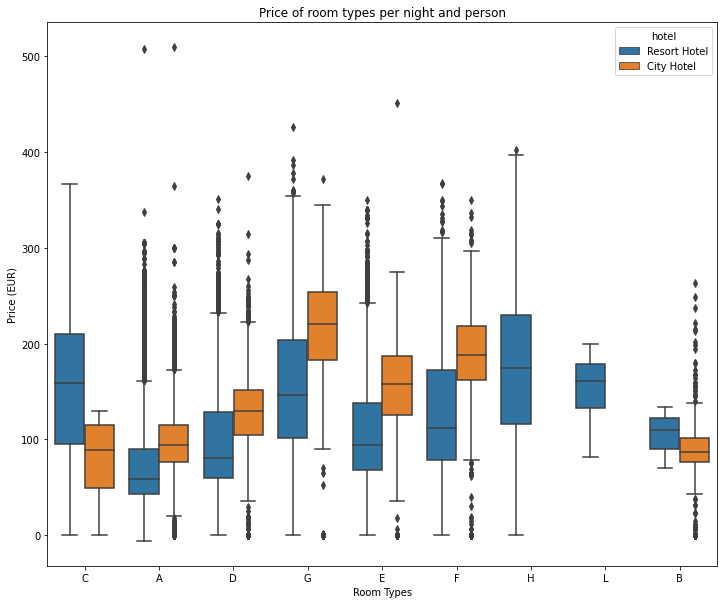

In [38]:
plt.figure(figsize = (12, 10))
sns.boxplot(x = 'reserved_room_type', y = 'adr', hue = 'hotel', data = not_canceled) 
# 'adr' stand for average daily rate

plt.xlabel('Room Types')
plt.ylabel('Price (EUR)')
# Since the majority of the customers are from Europe,
# so use Euro as currency for price. 
plt.title('Price of room types per night and person')

- For City Hotel, G room category is performing really well because of its high median value. 
- For Resort Hotel, the H room category has the highest meidan. 

### 3. What are the popular months of booking? 

In [40]:
resort_hotel= not_canceled[not_canceled['hotel'] == 'Resort Hotel']
city_hotel = not_canceled[not_canceled['hotel'] == 'City Hotel']

In [41]:
resort_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [42]:
resort_months = resort_hotel['arrival_date_month'].value_counts().reset_index()
resort_months.columns = ['month', 'number of guests']
resort_months

,month,number of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


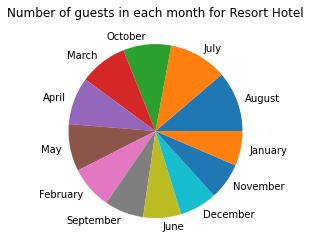

In [43]:
plt.pie(resort_months['number of guests'], labels = resort_months['month'])
plt.title('Number of guests in each month for Resort Hotel')
plt.show()

In [44]:
city_months = city_hotel['arrival_date_month'].value_counts().reset_index()
city_months.columns = ['month', 'number of guests']
city_months

,month,number of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


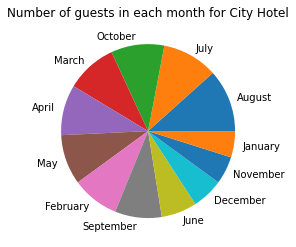

In [45]:
plt.pie(city_months['number of guests'], labels = resort_months['month'])
plt.title('Number of guests in each month for City Hotel')
plt.show()

Pie Charts are not obvious enough to see the differences

In [46]:
# merge 2 data frame into 1 data frame
merged_months = resort_months.merge(city_months, on = 'month')
merged_months.columns = ['month', 'num of guest_resort', "num of guest_city"]
merged_months

,month,num of guest_resort,num of guest_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [47]:
# sort the months
merged_months = sdm.Sort_Dataframeby_Month(merged_months, 'month')
merged_months

,month,num of guest_resort,num of guest_city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [48]:
px.line(merged_months, x = 'month', 
        y = ['num of guest_resort','num of guest_city'])

- August is the most popular month for both Resort and City hotels, the second popular month is July for both. 

- The third popular month for Resort hotel is October.

- And the third popular month for City hotel is May. 

### 4. Which month has the highest average daily rate?

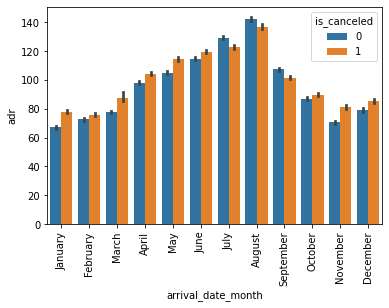

In [504]:
df_updated = sdm.Sort_Dataframeby_Month(df_updated, 'arrival_date_month')
sns.barplot(x = 'arrival_date_month', y = 'adr', data = df_updated, hue = 'is_canceled')
plt.xticks(rotation = 'vertical')
plt.show()

For the most of the months, the bar chart above shows that the canceled bookings have higher average daily rate than the not canceled bookings

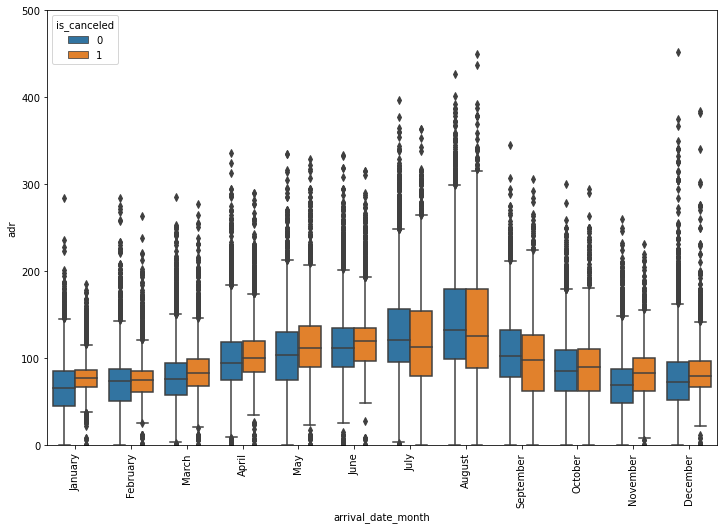

In [505]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'arrival_date_month', y = 'adr', data = df_updated, hue = 'is_canceled')
plt.xticks(rotation = 'vertical')
plt.ylim(0, 500)
plt.show()

Therefore, the high average daily rate could be one of the reason guests canceling the bookings 

### 5. Whether bookings were made for weekdays or for weekends or for both?

In [506]:
df_updated.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Need to use 'stays_in_weekend_nights', and 'stays_in_week_nights'

In [507]:
#create crosstable with'stays_in_weekend_nights', and 'stays_in_week_nights'
ww_cross = pd.crosstab(index = df_updated['stays_in_weekend_nights'], 
            columns = df_updated['stays_in_week_nights'])
ww_cross

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [508]:
def week_func(df):
    f1 = 'stays_in_weekend_nights'
    f2 = 'stays_in_week_nights'
    
    if df[f1] > 0 and df[f2] == 0 :
        return 'stay_just_weekend'
    
    elif df[f1] == 0 and df[f2] > 0:
        return 'stay_just_weekdays'
    
    elif df[f1] > 0 and df[f2] > 0:
        return 'stay_both_weekdays_weekend'
    
    else:
        return 'undefined'

In [509]:
# add another column 
df_updated['weekend_or_weekday'] = df_updated.apply(week_func, axis = 1)

In [510]:
# count number for each feature
df_updated['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekend    60388
stay_just_weekdays            51250
stay_just_weekend              6927
undefined                       645
Name: weekend_or_weekday, dtype: int64

In [511]:
# group by month
df_updated_grouped = df_updated.groupby(['arrival_date_month', 'weekend_or_weekday']).size().unstack().reset_index()

In [512]:
sorted_data_by_month = sdm.Sort_Dataframeby_Month(df_updated_grouped, 'arrival_date_month')
sorted_data_by_month.set_index('arrival_date_month', inplace = True)
sorted_data_by_month

,stay_both_weekdays_weekend,stay_just_weekdays,stay_just_weekend,undefined
arrival_date_month,,,,
January,2339,3075,457,50
February,3669,3796,533,54
March,4705,4512,499,52
April,6024,4420,601,33
May,5719,5197,788,76
June,5395,4942,554,38
July,7437,4528,621,58
August,7945,5221,646,49
September,5294,4531,652,23


sorted_data_by_month.plot(kind = 'bar', stacked = True, figsize = (15, 10))

From the stacked bar chart above, most bookings were made to stay just the weekdays (orange) or both weekends and weekdays (blue).

In [513]:
df_updated.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

### 6. New deposit feature

In [514]:
df_updated['deposit_type'].unique()
# 'No Deposit': 0, 'Non Refund': 1, 'Refundable':0

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [515]:
dict1 = {'No Deposit': 0, 'Non Refund': 1, 'Refundable': 0}
# create a feature 'not_canceled', which records if the deposit is given or not
# 1 is given, 0 is not given/refundable
df_updated['deposit_given'] = df_updated['deposit_type'].map(dict1)

#### Drop unnecessary columns

In [516]:
df_updated.drop(columns = ['deposit_type'], axis = 1, inplace = True)

In [517]:
df_updated.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'weekend_or_weekday', 'deposit_given'],
      dtype='object')

### 7. Turn Categorical variables into numerical variables by using mean encoding technique

In [51]:
df_updated.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                           object
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [52]:
df_updated.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [53]:
# extract out categorical data
cat_features = [i for i in df_updated.columns if df_updated[i].dtype == 'object']
cat_features

['hotel',
 'arrival_date_month',
 'children',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [54]:
cat_data = df_updated[cat_features]

In [55]:
# extract out numeric data
num_features = [i for i in df_updated.columns if df_updated[i].dtype != 'object']
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [56]:
num_data = df_updated[num_features]

In [57]:
df_updated.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [58]:
cat_data['cancellation'] = df_updated['is_canceled']

/var/folders/kf/m2h9rtcd0c94sqw_ggg_hff80000gn/T/ipykernel_58869/1557439263.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
cat_data['cancellation'].head()

0    0
1    0
2    0
3    0
4    0
Name: cancellation, dtype: int64

In [60]:
cols = cat_data.columns[0: -1]
cols

Index(['hotel', 'arrival_date_month', 'children', 'meal', 'country',
       'market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [61]:
# perform mean encoding technique
for i in cols:
    dict2 = cat_data.groupby([i])['cancellation'].mean().to_dict()
    cat_data[i] = cat_data[i].map(dict2)

/var/folders/kf/m2h9rtcd0c94sqw_ggg_hff80000gn/T/ipykernel_58869/1278825948.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kf/m2h9rtcd0c94sqw_ggg_hff80000gn/T/ipykernel_58869/1278825948.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kf/m2h9rtcd0c94sqw_ggg_hff80000gn/T/ipykernel_58869/1278825948.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [62]:
cat_data.head()

,hotel,arrival_date_month,children,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.374644,0.371275,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.28402,0.407864,0.0,0.800000,0
1,0.277674,0.374644,0.371275,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.28402,0.407864,0.0,0.800000,0
2,0.277674,0.374644,0.371275,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.28402,0.407864,0.0,0.985075,0
3,0.277674,0.374644,0.371275,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.28402,0.407864,0.0,0.985075,0
4,0.277674,0.374644,0.371275,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.28402,0.407864,0.0,0.522876,0


In [63]:
cat_num = pd.concat([cat_data, num_data], axis = 1)
cat_num.head()

,hotel,arrival_date_month,children,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.371275,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.28402,...,2,0,0,0,0,3,0,0.0,0,0
1,0.277674,0.374644,0.371275,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.28402,...,2,0,0,0,0,4,0,0.0,0,0
2,0.277674,0.374644,0.371275,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.28402,...,1,0,0,0,0,0,0,75.0,0,0
3,0.277674,0.374644,0.371275,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.28402,...,1,0,0,0,0,0,0,75.0,0,0
4,0.277674,0.374644,0.371275,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.28402,...,2,0,0,0,0,0,0,98.0,0,1


In [64]:
cat_num.columns

Index(['hotel', 'arrival_date_month', 'children', 'meal', 'country',
       'market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'reservation_status', 'reservation_status_date', 'cancellation',
       'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

'cancellation' and 'is_canceled' are duplicated, so drop 'cancellation'

In [65]:
cat_num.drop(columns = ['cancellation'], axis = 1, inplace = True)

### 9. Normality check 

/Users/oliviawang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='lead_time', ylabel='Density'>

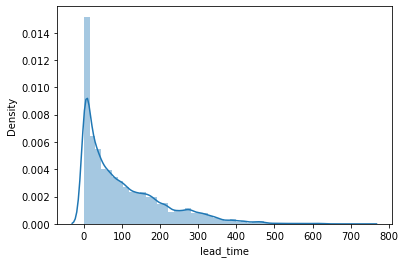

In [66]:
sns.distplot(cat_num['lead_time']) # the plot is skewed to the right

In [70]:
def log_trans(i) :
    cat_num[i] = np.log1p(cat_num[i])

/Users/oliviawang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

invalid value encountered in log1p



<AxesSubplot:xlabel='lead_time', ylabel='Density'>

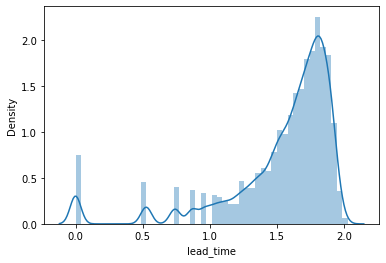

In [71]:
log_trans('lead_time')
sns.distplot(cat_num['lead_time']) # slightly better

/Users/oliviawang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='adr', ylabel='Density'>

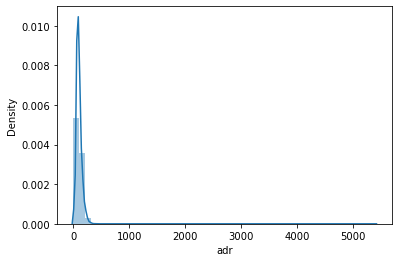

In [560]:
# ader
sns.distplot(cat_num['adr'])

In [72]:
cat_num[cat_num['adr'] < 0]

,hotel,arrival_date_month,children,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
14969,0.277674,0.322277,0.371275,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.28402,...,2,0,1,0,2,2,0,-6.38,0,0


In [73]:
log_trans('adr')

/Users/oliviawang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

invalid value encountered in log1p



In [74]:
cat_num['adr'].isnull().sum()

1

/Users/oliviawang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='adr', ylabel='Density'>

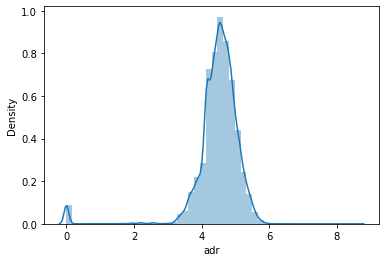

In [75]:
sns.distplot(cat_num['adr'].dropna())

In [570]:
%store cat_num

Stored 'cat_num' (DataFrame)
